In [1]:
import math
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn
import math
import operator
from sklearn.neighbors import KNeighborsClassifier

In [2]:
countsFile = "counts.csv"
seriesSmallFile = "SeriesSmall.csv"
counts= pd.read_csv(
    countsFile,
    sep = ",",
    header = 0,
    index_col = 0,
)
series_matrix = pd.read_csv('series matrix.csv')

In [3]:
countsnormlog = "countsNormLog.csv"
researchers = "researchers_PFC.csv"
countsnormlog= pd.read_csv(
    countsnormlog,
    sep = ",",
    header = 0,
    index_col = 0,
)
researchers = pd.read_csv(researchers, sep=",", header=0, index_col=0)

In [4]:
countsnormlog

,R15181,R15183_merged,R15207,R15274,R15394,R15395,R15396,R15399,R15402,R15428,...,R21863.1,R21864,R21866,R21868,R21869,R21870,R21871,R21872,R21873,R21874
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,0.853849,1.009380,0.794553,0.982752,0.947990,0.876330,0.926047,1.481132,0.884684,0.968143,...,0.695315,1.009433,0.792015,0.754875,0.856085,0.847858,0.840302,0.792871,0.785851,0.904112
ENSG00000000005.6,-1.519063,-1.558822,-2.406844,-2.700295,-1.126339,-2.671445,-1.639801,-2.452861,-1.727039,-1.495750,...,-1.254075,-1.320980,-1.349434,-0.936795,-0.803967,-1.076422,-1.273641,-1.563155,-1.208319,-1.039383
ENSG00000000419.14,1.149322,1.268547,1.249254,1.297092,1.332047,1.290925,1.312507,1.340930,1.328721,1.224409,...,1.302227,1.395023,1.322663,1.286354,1.372951,1.301067,1.338612,1.332819,1.350789,1.356467
ENSG00000000457.14,0.894236,0.976472,0.883191,0.950013,0.917678,0.942397,1.086927,1.054995,0.930017,0.940412,...,1.086369,1.017476,1.103119,1.094613,1.126182,1.137096,1.053718,1.066254,1.111827,1.124970
ENSG00000000460.17,0.880610,0.797204,0.696960,0.605057,0.621849,0.633907,0.615472,0.889562,0.627069,0.771421,...,0.389377,0.177330,0.425083,0.497241,0.189784,0.576791,0.706362,0.409973,0.438411,0.407775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000289707.1,-1.041942,-1.558822,-1.105814,-1.700295,-1.001400,-1.671445,-0.639801,-0.607763,-0.881941,-0.893690,...,-1.555105,-1.144889,-1.650464,-1.237825,-2.649065,-0.678482,-0.875701,-0.961095,-1.685440,-2.738353
ENSG00000289709.1,-1.041942,-0.558822,-0.176395,-0.320083,-0.457332,-0.440996,-0.192643,0.303014,-0.522919,0.035729,...,-1.077984,-1.320980,-0.805366,-1.112887,-1.171944,-0.678482,-0.428543,-0.864185,-0.986470,-1.136293
ENSG00000289711.1,-1.519063,-2.558822,-2.406844,-2.700295,-2.603460,-2.671445,-1.639801,-2.452861,-2.727039,-2.495750,...,-2.555105,-2.622010,-2.650464,-2.714947,-2.649065,-1.377452,-2.574671,-2.563155,-2.685440,-2.738353


In [5]:
counts=pd.DataFrame(counts)

# filter out genes with row sum less than 10
counts_filtered = counts[counts.sum(axis=1) >= 10].copy()
counts_filtered = counts_filtered.replace(0, 0.1)

# normalize
sample_reads = counts_filtered.sum(axis=0)  # Sum across columns (samples)
countsNotLog = counts_filtered.div(sample_reads, axis=1) * 1000000

# log10
countsLog = counts_filtered_normalized.apply(np.log10)

NameError: name 'counts_filtered_normalized' is not defined

In [6]:
countsNotLog.to_csv('countsNormNotLog.csv')
countsLog.to_csv('countsNormLog.csv')

NameError: name 'countsLog' is not defined

In [2]:
## Importing Normalized Log Counts
counts = pd.read_csv("countsNormLog.csv")
matrix = pd.read_csv("series matrix.csv")

In [3]:
countsnormlog

NameError: name 'countsnormlog' is not defined

In [4]:
counts = counts.set_index("Gene")
matrix = matrix.set_index("!Sample_title")

In [5]:
indexNames = counts.columns
matrix.columns = indexNames

In [6]:
# filter counts
matrix_t = matrix.transpose()
matrix_t_filt = matrix_t[matrix_t['!Sample_source_name_ch1'] == 'DLPFC']
counts_filtered = counts[matrix_t_filt.index]
counts_filtered = counts_filtered.T

In [7]:
matrix_t_filt

!Sample_title,!Sample_geo_accession,!Sample_source_name_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,...,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1,!Sample_characteristics_ch1
R15899,GSM8015226,DLPFC,tissue: DLPFC,dsm-5 aud status: AUD_Case,Sex: M,agedeath: 52.5,dsm-5 major depression diagnosis: 1,current smoker at death: Case,pmi: 25,rin: 10,...,sv7: -0.122686084,sv8: 0.078181318,sv9: -0.145421014,sv10: 0.12527323,sv11: -0.158428304,sv12: NA,sv9: -0.145421014,sv10: 0.12527323,sv11: -0.158428304,sv12: NA
R15908,GSM8015227,DLPFC,tissue: DLPFC,dsm-5 aud status: AUD_Case,Sex: M,agedeath: 54.2,dsm-5 major depression diagnosis: 1,current smoker at death: Case,pmi: 40,rin: 8.9,...,sv7: -0.050442266,sv8: -0.07953705,sv9: 0.058606915,sv10: 0.110725303,sv11: 0.06098711,sv12: NA,sv9: 0.058606915,sv10: 0.110725303,sv11: 0.06098711,sv12: NA
R15915_merged,GSM8015228,DLPFC,tissue: DLPFC,dsm-5 aud status: AUD_Case,Sex: M,agedeath: 56.7,dsm-5 major depression diagnosis: 1,current smoker at death: Control,pmi: 25.5,rin: 8.8,...,sv7: -0.045329856,sv8: -0.085616228,sv9: 0.137290943,sv10: 0.112008339,sv11: -0.115959515,sv12: NA,sv9: 0.137290943,sv10: 0.112008339,sv11: -0.115959515,sv12: NA
R15973.1,GSM8015229,DLPFC,tissue: DLPFC,dsm-5 aud status: non_AUD_Control,Sex: M,agedeath: 61.75,dsm-5 major depression diagnosis: 0,current smoker at death: Case,pmi: 22.5,rin: 8.2,...,sv7: 0.020004686,sv8: 0.06940017,sv9: 0.205330713,sv10: 0.020859138,sv11: -0.089524139,sv12: NA,sv9: 0.205330713,sv10: 0.020859138,sv11: -0.089524139,sv12: NA
R15977,GSM8015230,DLPFC,tissue: DLPFC,dsm-5 aud status: non_AUD_Control,Sex: F,agedeath: 48.69,dsm-5 major depression diagnosis: 0,current smoker at death: Case,pmi: 41.5,rin: 8.3,...,sv7: -0.089039511,sv8: -0.078653054,sv9: -0.013553699,sv10: -0.069810887,sv11: 0.023342618,sv12: NA,sv9: -0.013553699,sv10: -0.069810887,sv11: 0.023342618,sv12: NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R21870,GSM8015317,DLPFC,tissue: DLPFC,dsm-5 aud status: non_AUD_Control,Sex: M,agedeath: 78.03958476,dsm-5 major depression diagnosis: 1,current smoker at death: Control,pmi: 35.5,rin: 7.999978633,...,sv7: -0.015710538,sv8: -0.024241243,sv9: 0.084830078,sv10: -0.052159,sv11: -0.029571749,sv12: NA,sv9: 0.084830078,sv10: -0.052159,sv11: -0.029571749,sv12: NA
R21871,GSM8015318,DLPFC,tissue: DLPFC,dsm-5 aud status: AUD_Case,Sex: M,agedeath: 48.02190281,dsm-5 major depression diagnosis: 1,current smoker at death: Case,pmi: 30.5,rin: 6.975813733,...,sv7: 0.009005214,sv8: -0.069637227,sv9: -0.149270255,sv10: -0.079711511,sv11: 0.0020547,sv12: NA,sv9: -0.149270255,sv10: -0.079711511,sv11: 0.0020547,sv12: NA
R21872,GSM8015319,DLPFC,tissue: DLPFC,dsm-5 aud status: AUD_Case,Sex: M,agedeath: 57.62069359,dsm-5 major depression diagnosis: 1,current smoker at death: Control,pmi: 32,rin: 6.791212389,...,sv7: 0.049986979,sv8: 0.023277504,sv9: 0.057672395,sv10: 0.05084497,sv11: -0.059813383,sv12: NA,sv9: 0.057672395,sv10: 0.05084497,sv11: -0.059813383,sv12: NA
R21873,GSM8015320,DLPFC,tissue: DLPFC,dsm-5 aud status: AUD_Case,Sex: M,agedeath: 36.53661875,dsm-5 major depression diagnosis: 1,current smoker at death: Control,pmi: 24,rin: 6.881841311,...,sv7: 0.057891046,sv8: 0.003990728,sv9: -0.04395557,sv10: -0.069962646,sv11: -0.014912812,sv12: NA,sv9: -0.04395557,sv10: -0.069962646,sv11: -0.014912812,sv12: NA


In [8]:
# filter series matrix
matrix_filtered = matrix[matrix_t_filt.index]

In [9]:
matrix_filtered

,R15899,R15908,R15915_merged,R15973.1,R15977,R15981,R16002,R16078,R16099,R16102,...,R21863.1,R21864,R21866,R21868,R21869,R21870,R21871,R21872,R21873,R21874
!Sample_title,,,,,,,,,,,,,,,,,,,,,
!Sample_geo_accession,GSM8015226,GSM8015227,GSM8015228,GSM8015229,GSM8015230,GSM8015231,GSM8015232,GSM8015233,GSM8015234,GSM8015235,...,GSM8015312,GSM8015313,GSM8015314,GSM8015315,GSM8015316,GSM8015317,GSM8015318,GSM8015319,GSM8015320,GSM8015321
!Sample_source_name_ch1,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,...,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC,DLPFC
!Sample_characteristics_ch1,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,...,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC,tissue: DLPFC
!Sample_characteristics_ch1,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: AUD_Case,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,...,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: non_AUD_Control,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case,dsm-5 aud status: AUD_Case
!Sample_characteristics_ch1,Sex: M,Sex: M,Sex: M,Sex: M,Sex: F,Sex: M,Sex: M,Sex: M,Sex: F,Sex: M,...,Sex: M,Sex: M,Sex: M,Sex: M,Sex: M,Sex: M,Sex: M,Sex: M,Sex: M,Sex: M
!Sample_characteristics_ch1,agedeath: 52.5,agedeath: 54.2,agedeath: 56.7,agedeath: 61.75,agedeath: 48.69,agedeath: 76.69,agedeath: 43.11,agedeath: 59.86,agedeath: 52.69,agedeath: 38.99,...,agedeath: 37.42379649,agedeath: 44.77481177,agedeath: 64.26009582,agedeath: 57.05692448,agedeath: 65.65377595,agedeath: 78.03958476,agedeath: 48.02190281,agedeath: 57.62069359,agedeath: 36.53661875,agedeath: 37.00205339
!Sample_characteristics_ch1,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,...,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 0,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 1,dsm-5 major depression diagnosis: 1
!Sample_characteristics_ch1,current smoker at death: Case,current smoker at death: Case,current smoker at death: Control,current smoker at death: Case,current smoker at death: Case,current smoker at death: Control,current smoker at death: Control,current smoker at death: Control,current smoker at death: Case,current smoker at death: Case,...,current smoker at death: Case,current smoker at death: Case,current smoker at death: Case,current smoker at death: Case,current smoker at death: Control,current smoker at death: Control,current smoker at death: Case,current smoker at death: Control,current smoker at death: Control,current smoker at death: Control
!Sample_characteristics_ch1,pmi: 25,pmi: 40,pmi: 25.5,pmi: 22.5,pmi: 41.5,pmi: 28.5,pmi: 16,pmi: 26,pmi: 23.5,pmi: 32,...,pmi: 33,pmi: 23.5,pmi: 22,pmi: 37.5,pmi: 31,pmi: 35.5,pmi: 30.5,pmi: 32,pmi: 24,pmi: 13


In [10]:
counts_filtered

Gene,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.14,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.17,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.15,...,ENSG00000289700.1,ENSG00000289701.1,ENSG00000289702.1,ENSG00000289703.1,ENSG00000289704.1,ENSG00000289707.1,ENSG00000289709.1,ENSG00000289711.1,ENSG00000289716.1,ENSG00000289719.1
R15899,0.807311,-2.671256,1.375239,1.164435,0.513435,0.642611,0.865302,1.014486,1.763153,1.577208,...,-2.671256,0.099596,-0.972286,-2.671256,-2.671256,-0.893105,-1.370226,-2.671256,-0.179894,-1.370226
R15908,0.735653,-0.952321,1.355709,1.107431,0.545989,0.025402,1.059460,0.883369,1.505939,1.522987,...,-2.554381,0.314850,-0.952321,-2.554381,-2.554381,-1.253351,-0.554381,-2.554381,-0.077260,-1.554381
R15915_merged,0.804222,-0.962934,1.339722,0.942862,0.568545,-0.203266,0.958753,0.926368,1.572360,1.562759,...,-2.564994,0.159282,-1.087873,-1.263964,-2.564994,-0.866024,-0.962934,-2.564994,0.068475,-1.564994
R15973.1,0.765416,-0.816647,1.328238,1.053757,0.443424,0.247811,0.965826,0.890923,1.589893,1.452399,...,-2.515617,0.269713,-0.670519,-2.515617,-2.515617,-1.038496,-0.816647,-2.515617,-0.117677,-1.515617
R15977,0.886065,-1.187042,1.324396,1.197968,0.686085,-0.001405,0.895744,1.134488,1.842477,1.633379,...,-2.664163,-0.020710,-0.965193,-1.363133,-2.664163,-1.664163,-1.062103,-2.664163,-0.030695,-0.965193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R21870,0.847858,-1.076422,1.301067,1.137096,0.576791,0.586336,1.264022,0.942695,1.565548,1.496450,...,-2.377452,0.053912,-1.377452,-2.377452,-2.377452,-0.678482,-0.678482,-1.377452,0.213613,-2.377452
R21871,0.840302,-1.273641,1.338612,1.053718,0.706362,0.106570,0.973103,1.150423,1.810398,1.635647,...,-2.574671,0.294560,-0.370551,-0.972611,-2.574671,-0.875701,-0.428543,-2.574671,0.038112,-1.574671
R21872,0.792871,-1.563155,1.332819,1.066254,0.409973,0.281943,1.066254,0.956673,1.636326,1.478237,...,-2.563155,-0.071794,-0.961095,-2.563155,-2.563155,-0.961095,-0.864185,-2.563155,-0.086034,-1.262125
R21873,0.785851,-1.208319,1.350789,1.111827,0.438411,0.077988,0.898891,0.958012,1.674585,1.502080,...,-2.685440,-0.062191,-1.083380,-2.685440,-2.685440,-1.685440,-0.986470,-2.685440,-0.238282,-1.384410


## Find the DEGs that the researchers found for PFC, then filter counts matrix for only these

In [11]:
researchersDEGs = pd.read_csv('researchers_NAc.csv')
researchersDEGs = researchersDEGs.set_index("Ensembl ID")

In [12]:
researchersDEGs

,SYMBOL,pvalue,overall.eff.direction,p.adjust.fdr,Nac_LIBD_log_2_fold_change,Nac_UT_log_2_fold_change,same_direction
Ensembl ID,,,,,,,
ENSG00000115758.13,ODC1,1.590000e-09,+,0.000023,0.271592,0.222004,True
ENSG00000223547.10,ZNF844,2.370000e-09,+,0.000023,0.424554,0.098229,True
ENSG00000113369.9,ARRDC3,5.150000e-08,+,0.000329,0.475648,0.355734,True
ENSG00000231528.3,FAM225A,8.470000e-08,+,0.000406,0.583752,0.892203,True
ENSG00000228315.12,GUSBP11,2.340000e-07,-,0.000895,-0.180689,-0.139503,True
...,...,...,...,...,...,...,...
ENSG00000289554.1,ENSG00000289554,1.000000e+00,-,1.000000,-0.050269,0.056303,False
ENSG00000289628.1,ENSG00000289628,8.086225e-01,-,1.000000,0.031250,-0.100180,False
ENSG00000289687.1,ENSG00000289687,8.432175e-01,+,1.000000,0.084167,-0.008359,False


In [13]:
researchersDEGs_filtered = researchersDEGs[(researchersDEGs['p.adjust.fdr'] < 0.05) & (researchersDEGs['same_direction'] == True)]

In [20]:
researchersDEGs_filtered

54

In [20]:
# extract list of genes
genes = researchersDEGs_filtered.index

# filter counts for only these
counts_filtered = counts_filtered.loc[:, counts_filtered.columns.intersection(genes)]

In [21]:
counts_filtered

,ENSG00000070610.14,ENSG00000072274.13,ENSG00000082898.19,ENSG00000083444.17,ENSG00000088256.9,ENSG00000100314.4,ENSG00000100433.16,ENSG00000102595.21,ENSG00000104218.16,ENSG00000108932.13,...,ENSG00000231528.3,ENSG00000234056.3,ENSG00000243406.6,ENSG00000265972.6,ENSG00000271474.1,ENSG00000272686.1,ENSG00000273173.5,ENSG00000288025.1,ENSG00000288558.2,ENSG00000289559.1
R15899,1.828980,2.211837,2.173532,1.342844,1.560214,0.677049,1.407201,1.622548,1.542262,0.750348,...,0.418649,-0.671256,1.079252,1.924130,0.804415,0.484080,0.750348,0.675097,1.454225,-0.629863
R15908,1.845119,1.756312,2.340378,1.436845,1.628033,0.542529,1.325860,1.495224,1.506316,0.952124,...,0.479042,-0.440438,0.649739,1.822378,0.528404,0.308941,0.888098,0.320680,1.222320,-0.408253
R15915_merged,1.923416,1.838127,2.382832,1.490767,1.639669,0.499464,1.288096,1.578645,1.614271,1.005549,...,0.949554,-0.661904,0.718307,2.145293,0.472433,0.286265,0.843246,0.706848,1.168203,-0.485813
R15973.1,1.923558,1.984482,2.154536,1.329481,1.690669,0.408662,1.124864,1.568959,1.504330,0.717379,...,0.347706,-0.173194,0.707099,1.667653,0.633602,0.509689,0.812763,0.497220,1.252281,-0.612527
R15977,1.818139,2.005897,2.282388,1.435172,1.511639,0.742377,1.313103,1.601598,1.606283,0.697565,...,0.871131,0.026033,1.026033,2.144723,0.963203,0.600655,0.674293,0.400295,1.437584,-0.321740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R21870,1.932179,2.153388,2.225584,1.428728,1.697365,0.604820,1.214725,1.630723,1.733811,0.887366,...,0.113910,0.069706,0.842656,1.842395,0.609320,0.520175,0.798640,0.932179,1.505642,-0.336059
R21871,1.711336,1.851026,2.244609,1.358816,1.508473,0.901000,1.300969,1.609168,1.620120,0.721994,...,0.877115,-0.112273,1.184996,2.146892,0.909628,0.535918,0.765773,0.270427,1.311819,-0.671581
R21872,1.922140,2.069707,2.175308,1.333922,1.676394,0.405328,1.238248,1.553452,1.447992,0.902228,...,0.281943,-0.521763,0.604162,1.581730,0.699296,0.466229,0.720146,0.275694,1.384278,-0.332706
R21873,1.942744,2.075510,2.213010,1.363001,1.656785,0.534668,1.204981,1.514589,1.453178,0.815619,...,0.228373,-0.571497,0.707257,1.608585,0.674395,0.481877,0.557598,0.363778,1.435791,-0.571497


## Split data into training and testing

In [22]:
# add condition variable to counts dataset
conditions = list(matrix_filtered.iloc[3]) # extract condition from series matrix
counts_filtered['condition'] = conditions
counts_filtered

,ENSG00000070610.14,ENSG00000072274.13,ENSG00000082898.19,ENSG00000083444.17,ENSG00000088256.9,ENSG00000100314.4,ENSG00000100433.16,ENSG00000102595.21,ENSG00000104218.16,ENSG00000108932.13,...,ENSG00000234056.3,ENSG00000243406.6,ENSG00000265972.6,ENSG00000271474.1,ENSG00000272686.1,ENSG00000273173.5,ENSG00000288025.1,ENSG00000288558.2,ENSG00000289559.1,condition
R15899,1.828980,2.211837,2.173532,1.342844,1.560214,0.677049,1.407201,1.622548,1.542262,0.750348,...,-0.671256,1.079252,1.924130,0.804415,0.484080,0.750348,0.675097,1.454225,-0.629863,dsm-5 aud status: AUD_Case
R15908,1.845119,1.756312,2.340378,1.436845,1.628033,0.542529,1.325860,1.495224,1.506316,0.952124,...,-0.440438,0.649739,1.822378,0.528404,0.308941,0.888098,0.320680,1.222320,-0.408253,dsm-5 aud status: AUD_Case
R15915_merged,1.923416,1.838127,2.382832,1.490767,1.639669,0.499464,1.288096,1.578645,1.614271,1.005549,...,-0.661904,0.718307,2.145293,0.472433,0.286265,0.843246,0.706848,1.168203,-0.485813,dsm-5 aud status: AUD_Case
R15973.1,1.923558,1.984482,2.154536,1.329481,1.690669,0.408662,1.124864,1.568959,1.504330,0.717379,...,-0.173194,0.707099,1.667653,0.633602,0.509689,0.812763,0.497220,1.252281,-0.612527,dsm-5 aud status: non_AUD_Control
R15977,1.818139,2.005897,2.282388,1.435172,1.511639,0.742377,1.313103,1.601598,1.606283,0.697565,...,0.026033,1.026033,2.144723,0.963203,0.600655,0.674293,0.400295,1.437584,-0.321740,dsm-5 aud status: non_AUD_Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R21870,1.932179,2.153388,2.225584,1.428728,1.697365,0.604820,1.214725,1.630723,1.733811,0.887366,...,0.069706,0.842656,1.842395,0.609320,0.520175,0.798640,0.932179,1.505642,-0.336059,dsm-5 aud status: non_AUD_Control
R21871,1.711336,1.851026,2.244609,1.358816,1.508473,0.901000,1.300969,1.609168,1.620120,0.721994,...,-0.112273,1.184996,2.146892,0.909628,0.535918,0.765773,0.270427,1.311819,-0.671581,dsm-5 aud status: AUD_Case
R21872,1.922140,2.069707,2.175308,1.333922,1.676394,0.405328,1.238248,1.553452,1.447992,0.902228,...,-0.521763,0.604162,1.581730,0.699296,0.466229,0.720146,0.275694,1.384278,-0.332706,dsm-5 aud status: AUD_Case
R21873,1.942744,2.075510,2.213010,1.363001,1.656785,0.534668,1.204981,1.514589,1.453178,0.815619,...,-0.571497,0.707257,1.608585,0.674395,0.481877,0.557598,0.363778,1.435791,-0.571497,dsm-5 aud status: AUD_Case


In [23]:
# split into train/test data
traindata = counts_filtered.head(67)
testdata = counts_filtered.tail(29)
# extract conditions
train_condition = list(traindata['condition'])
test_condition = list(testdata['condition'])

## Create and run KNN model

In [24]:
# create model
neigh = KNeighborsClassifier(n_neighbors=5)

# train model
neigh.fit(traindata.drop('condition', axis = 1), train_condition)

KNeighborsClassifier()

In [25]:
# test model
predictions = neigh.predict(testdata.drop('condition', axis = 1))
print(predictions)

['dsm-5 aud status: non_AUD_Control' 'dsm-5 aud status: non_AUD_Control'
 'dsm-5 aud status: non_AUD_Control' 'dsm-5 aud status: non_AUD_Control'
 'dsm-5 aud status: AUD_Case' 'dsm-5 aud status: AUD_Case'
 'dsm-5 aud status: AUD_Case' 'dsm-5 aud status: non_AUD_Control'
 'dsm-5 aud status: AUD_Case' 'dsm-5 aud status: non_AUD_Control'
 'dsm-5 aud status: non_AUD_Control' 'dsm-5 aud status: AUD_Case'
 'dsm-5 aud status: non_AUD_Control' 'dsm-5 aud status: AUD_Case'
 'dsm-5 aud status: non_AUD_Control' 'dsm-5 aud status: non_AUD_Control'
 'dsm-5 aud status: non_AUD_Control' 'dsm-5 aud status: non_AUD_Control'
 'dsm-5 aud status: non_AUD_Control' 'dsm-5 aud status: non_AUD_Control'
 'dsm-5 aud status: AUD_Case' 'dsm-5 aud status: non_AUD_Control'
 'dsm-5 aud status: AUD_Case' 'dsm-5 aud status: AUD_Case'
 'dsm-5 aud status: non_AUD_Control' 'dsm-5 aud status: non_AUD_Control'
 'dsm-5 aud status: AUD_Case' 'dsm-5 aud status: non_AUD_Control'
 'dsm-5 aud status: AUD_Case']


In [26]:
#Report accuracy % of the classfier by comparing to test_condition
numCorrect = 0
index = 0
for prediction in predictions: # loop through each prediction, and if it's correct, add 1 to the total correct predictions
    if (prediction == test_condition[index]):
        numCorrect += 1
    index += 1

accuracy = numCorrect/len(predictions)
print(accuracy)

0.6551724137931034


### Find most accurate K

In [54]:
# find best number of neighbors
kList = [1,3,5,7,9,11,13,15,17,19,21,23,25]
accuracy_df = pd.DataFrame(kList, columns = ['k Neighbors'])
tempList = [0] * 13
accuracy_df['Accuracy'] = tempList
accuracy_df = accuracy_df.set_index('k Neighbors')

In [50]:
accuracy_df

,Accuracy
k Neighbors,
1,0
3,0
5,0
7,0
9,0
11,0
13,0
15,0
17,0


In [55]:
# loop to find best fit
for n in range(1, 25, 2):
    # create model
    neigh = KNeighborsClassifier(n_neighbors=n)

    # train model
    neigh.fit(traindata.drop('condition', axis = 1), train_condition)
    
    # test model
    predictions = neigh.predict(testdata.drop('condition', axis = 1))
    
    #Report accuracy % of the classfier by comparing to test_condition
    numCorrect = 0
    index = 0
    for prediction in predictions: # loop through each prediction, and if it's correct, add 1 to the total correct predictions
        if (prediction == test_condition[index]):
            numCorrect += 1
        index += 1

    accuracy = numCorrect/len(predictions)
    accuracy_df.loc[n, 'Accuracy'] = accuracy

/tmp/ipykernel_2255150/703567418.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.6551724137931034' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  accuracy_df.loc[n, 'Accuracy'] = accuracy


In [56]:
accuracy_df = accuracy_df.reset_index()
accuracy_df

,k Neighbors,Accuracy
0,1,0.655172
1,3,0.724138
2,5,0.655172
3,7,0.689655
4,9,0.689655
5,11,0.689655
6,13,0.724138
7,15,0.724138
8,17,0.724138
9,19,0.724138


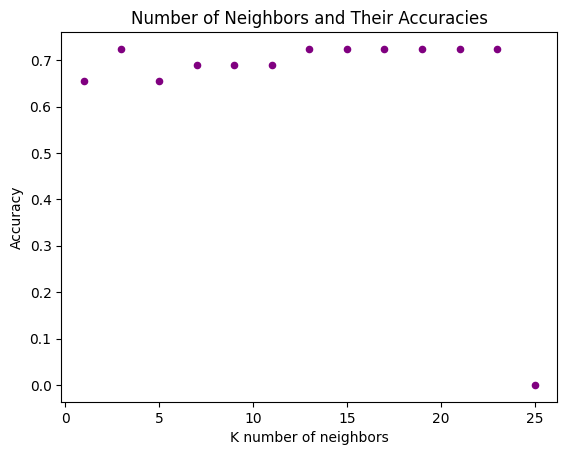

In [57]:
accuracy_df.plot(x='k Neighbors', y='Accuracy', kind='scatter', color='purple')
plt.title('Number of Neighbors and Their Accuracies')
plt.xlabel('K number of neighbors')
plt.ylabel('Accuracy')
plt.show()